# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.


## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("../../assets/datasets/imdb_p6_sample.csv")

In [5]:
df.head(2)

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 13 columns):
HA                26 non-null int64
rating            26 non-null float64
tconst            26 non-null object
title             26 non-null object
year              26 non-null int64
excellent         26 non-null int64
great             26 non-null int64
love              26 non-null int64
beautiful         26 non-null int64
best              26 non-null int64
hope              26 non-null int64
groundbreaking    26 non-null int64
amazing           26 non-null int64
dtypes: float64(1), int64(10), object(2)
memory usage: 2.7+ KB


In [9]:
y=df['rating']
X=df[['excellent','great','love','beautiful','best','hope','groundbreaking','amazing']]
dummies = pd.get_dummies(df.year)
Xd = pd.concat([X,dummies],axis=1)

## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [50]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

cv = KFold(len(y), shuffle=True, random_state=41)

dt = DecisionTreeRegressor()
s = cross_val_score(dt, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Decision Tree R2", s.mean().round(3), s.std().round(3))

Decision Tree R2 Score:	-2.24 ± 1.37


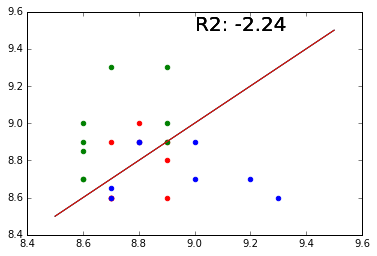

In [51]:
def do_plot(model, m=None):
    for fold, color in zip(cv, ['r', 'g', 'b']):
        X_train = X.iloc[fold[0]]
        X_test  = X.iloc[fold[1]]
        y_train = y.iloc[fold[0]]
        y_test  = y.iloc[fold[1]]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        plt.scatter(y_test, y_pred, color=color)
        plt.plot([8.5,9.5],[8.5,9.5])
        plt.text(9,9.5, "R2: "+str(m), fontsize=20, )
        
do_plot(dt, s.mean().round(2))

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?

Random Forest R2 Score:	-1.78 ± 0.889


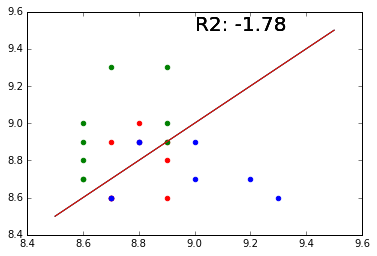

In [52]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
s = cross_val_score(rf, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest R2", s.mean().round(3), s.std().round(3))

do_plot(dt, s.mean().round(2))

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

Random Forest R2 Score:	-1.45 ± 0.582


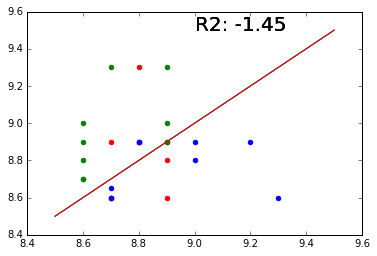

In [60]:
from sklearn.ensemble import AdaBoostRegressor

ab = AdaBoostRegressor()
s = cross_val_score(ab, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest R2", s.mean().round(3), s.std().round(3))

do_plot(dt, s.mean().round(2))

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

Random Forest R2 Score:	-1.47 ± 0.792


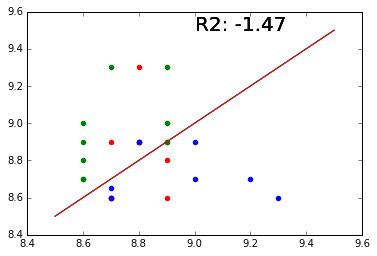

In [63]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
s = cross_val_score(gb, X, y, cv=cv, n_jobs=-1)
print "{} Score:\t{:0.3} ± {:0.3}".format("Random Forest R2", s.mean().round(3), s.std().round(3))

do_plot(dt, s.mean().round(2))

## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus

Take the best model and try to improve it using grid search.

In [74]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[10,20,30], 
          'learning_rate':[10**(-i) for i in range(0,5)],
          'loss':['ls', 'lad', 'huber', 'quantile'],
          'min_samples_split':range(1,5),
          'min_samples_leaf':range(1,5),
          'max_depth':range(1,5)
          }
gs = GridSearchCV(gb,params,n_jobs=-1)

In [75]:
gs.fit(X,y)
print(gs.best_params_)
gs.best_score_

{'loss': 'lad', 'learning_rate': 0.1, 'min_samples_leaf': 2, 'n_estimators': 30, 'min_samples_split': 1, 'max_depth': 1}


-6.5325803036176744